## Playground for an ABM prototype

In [1]:
import agent as ag
import numpy as np
# Model design
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython


In [8]:
n_people = 10
gd = ag.generate_gender_distribution(n_people=n_people, percentage=50)
ad = ag.generate_age_distribution(n_people=n_people, n_age_groups=4, start=24, stop=65, percentage=[.25, .23, .31, .21])

people = []
for i in range(n_people):
    features = ag.Features(str(i),
                        gd[i], 
                        ad[i], 
                        "low", 
                        "True", 
                        "Single", 
                        "False", 
                        "True", 
                        "True", 
                        "False", 
                        "True", 
                        "True", 
                        "False", 
                        "True", 
                        "False", 
                        "False", 
                        "False")
    people.append(ag.Agent(features=features))
    
    

In [5]:
people[0].summary()

name: 0
gender: 0
age: 46
education: low
employed: True
partnership_status: Single
pre_existing_depression: False
pre_existing_burnout: True
pre_existing_addiction: True
pre_existing_chronic_fatigue: False
parenthood: True
living_with_child: True
single_parent: False
housing_difficulties: True
finance_difficulties: False
pre_existing_health_issues: False
partner_difficulties: False
n_contacts: 0


In [9]:
for p in people:
    print(f'name:{p.features.name}, gender:{p.features.gender}, age: {p.features.age}')


name:0, gender:1, age: 24
name:1, gender:1, age: 64
name:2, gender:0, age: 30
name:3, gender:1, age: 47
name:4, gender:0, age: 48
name:5, gender:0, age: 27
name:6, gender:0, age: 54
name:7, gender:1, age: 62
name:8, gender:0, age: 45
name:9, gender:1, age: 48


In [ ]:
@dataclass
class Lockdown():
    ''' Represents the type of lockdown'''
    __slots__ = ['name', 'frequency', 'length', 'severity']
    
    name: str
    frequency: float
    start: float
    end: float
    severity: int    

In [12]:
person1 = Agent("a","F", 18, "low", "True", "Single", "False", "True", "True", "False", "True", "True", "False", "True", "False", "False", "False")


In [6]:
person.age

18

In [53]:

class Agent():
    ''' Represents an agent in our small world '''
    
    def __init__(self, condition, age, mental_state):
        ''' Initialisation '''
        self.condition = condition
        self.age = age
        self.mental_state = mental_state    
   
    def becoming_positive(self):
        ''' Agent has tested positive '''
        self.condition = 1
        self.mental_state =+ np.random.rand()
    
    def working_from_home(self):
        ''' Agent is working from home '''
        self.mental_state =+ np.random.rand()
    
   
class Simulation():
    def __init__(self,n_people,n_steps,p):
        conditions = np.random.randint(2,size=n_people)
        ages = np.random.choice(np.arange(18,60),size=n_people)
        mental_states = np.random.randint(2,size=n_people)
        
        self.agents = []
        for i in range(n_people):
            self.agents.append(Agent(condition=0,#conditions[i],
                                     age=ages[i],
                                     mental_state=mental_states[i]))
        self.n_steps = n_steps
        self.n_people = n_people
        self.p = p
        
    def update(self,p):
        infected = np.random.choice(np.arange(self.n_people),size=int(p*self.n_people))
        for i in infected:
            self.agents[i].becoming_positive()
            
    def monitor_mh_average(self):
        mh = [i.mental_state for i in self.agents]
        
        return np.mean(mh)
        
        
    def run(self):
        avg_mh = np.zeros(self.n_steps)
        for step in range(self.n_steps):
            self.update(self.p)
            avg_mh[step] = self.monitor_mh_average()
            
        return avg_mh
            
            
        
            
    
    
        
        
        


In [56]:
model = Simulation(n_people=1000,
                   n_steps=50,
                   p=0.1)

mh = model.run()

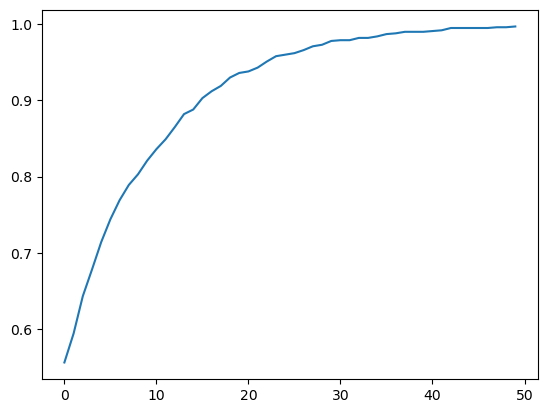

In [57]:
plt.plot(mh)

In [24]:
class VirusModel(ap.Model):

    def setup(self):
        """ Initialize the agents and network of the model. """

        # Prepare a small-world network
        graph = nx.watts_strogatz_graph(
            self.p.population,
            self.p.number_of_neighbors,
            self.p.network_randomness)

        # Create agents and network
        self.agents = ap.AgentList(self, self.p.population, Person)
        self.network = self.agents.network = ap.Network(self, graph)
        self.network.add_agents(self.agents, self.network.nodes)

        # Infect a random share of the population
        I0 = int(self.p.initial_infection_share * self.p.population)
        self.agents.random(I0).condition = 1

    def update(self):
        """ Record variables after setup and each step. """

        # Record share of agents with each condition
        for i, c in enumerate(('S', 'I', 'R')):
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / self.p.population
            self.record(c)

        # Stop simulation if disease is gone
        if self.I == 0:
            self.stop()

    def step(self):
        """ Define the models' events per simulation step. """

        # Call 'being_sick' for infected agents
        self.agents.select(self.agents.condition == 1).being_sick()

    def end(self):
        """ Record evaluation measures at the end of the simulation. """

        # Record final evaluation measures
        self.report('Total share infected', self.I + self.R)
        self.report('Peak share infected', max(self.log['I']))

Init signature: ap.Model(parameters=None, _run_id=None, **kwargs)
Docstring:     
Template of an agent-based model.

Arguments:
    parameters (dict, optional):
        Dictionary of the model's parameters.
        Default values will be selected from entries of type
        :class:`Range`, :class:`IntRange`, and :class:`Values`.
        The following parameters will be used automatically:

        - steps (int, optional):
          Defines the maximum number of time-steps.
          If none is passed, there will be no step limit.
        - seed (int, optional):
          Used to initiate the model's random number generators.
          If none is passed, a random seed will be generated.
        - report_seed (bool, optional):
          Whether to document the random seed used (default True).

    **kwargs: Will be forwarded to :func:`Model.setup`.

Attributes:
    type (str): The model's class name.
    info (InfoStr): Information about the model's current state.
    p (AttrDict): The 

In [23]:
model = MyModel()
agent = Agent(MyModel,0,1,1)

TypeError: _new_id() missing 1 required positional argument: 'self'

In [17]:
class Agent(ap.Agent):
    ''' Represents an agent in our small world '''
    
    def setup(self):
        ''' Initialisation '''
        self.x = 0
        
   # def becoming_positive(self):
   #     ''' Agent has tested positive '''
   #     self.condition = 1
   #     self.mental_state =+ np.random.rand(1,1)
   # return Agent(self.condition, self.age, self.mental_state)

In [18]:
Agent()

TypeError: __init__() missing 1 required positional argument: 'model'